# Market segmentation using K-Means 

### import libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load Data

In [2]:
data = pd.read_csv('data/market segmentation.csv')

In [3]:
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Satisfaction,30.0,6.400,2.620871,1.00,4.2500,7.00,8.7500,10.00
Loyalty,30.0,0.001,1.016476,-1.69,-0.9675,0.15,0.9475,1.38


### Plot data

Text(0, 0.5, 'Loyalty')

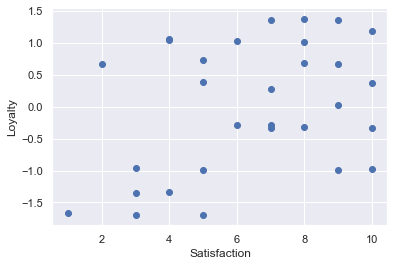

In [5]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### Select features

In [17]:
x = data.copy()
x

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


### CLustering 

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering Results

In [8]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)
clusters.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1


Text(0, 0.5, 'Loyalty')

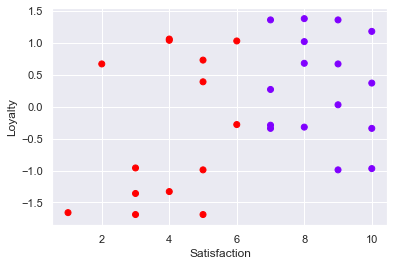

In [9]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### Standardize the variables 

In [22]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

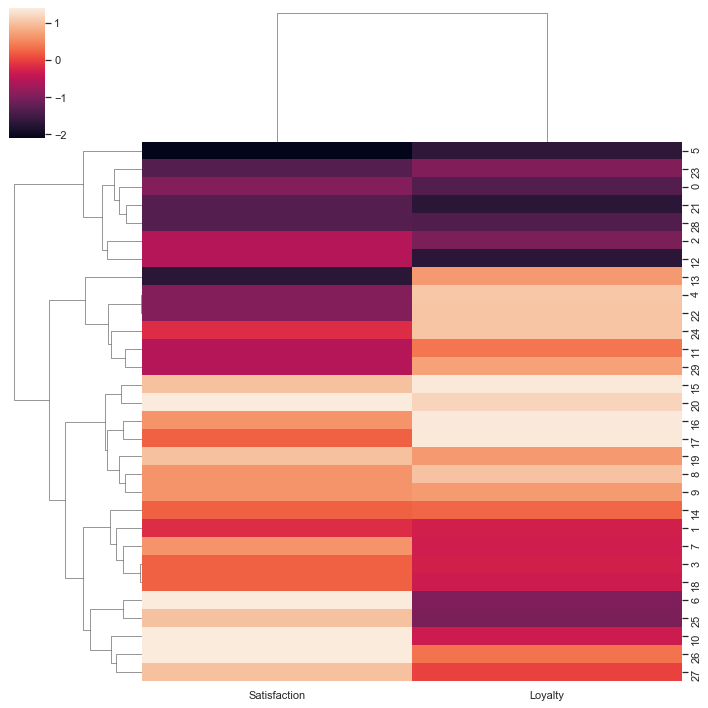

In [23]:
# let's create a dendogram
x_dendo = pd.DataFrame(x_scaled, columns=['Satisfaction', 'Loyalty'])
sns.clustermap(x_dendo)

### Use The Elbow method to find the Best number of clusters

In [12]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.586212092192188,
 5.366082587179452,
 4.358871893303258,
 3.979111396806159]

Text(0, 0.5, 'wcss')

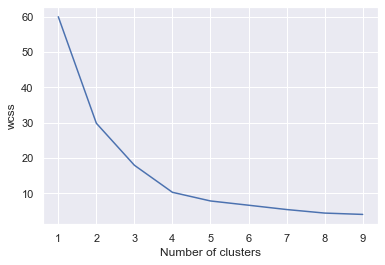

In [14]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

### Explore clustering solutions and select the number of clusters

In [15]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,3
9,8,0.68,3


Text(0, 0.5, 'Loyalty')

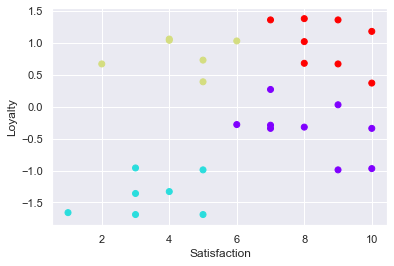

In [16]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

We obtain 4 groups of people: 
**group 1** (green) called  **Alienated** - they are not loyal to the brand and are not satisfied 
**group 2** (red) called  **Supporters** - they are loyal to the brand and are not satisfied 
**group 3** (purple) called  **Roamers** - they are not really loyal to the brand and are not really satisfied 
**group 4** (green) called  **Fans** - they are fully loyal to the brand and are fully satisfied 

The goal of the business is to get every customers to be a **fan (group 4)** of the brand